<a href="https://colab.research.google.com/github/beelittlehoney/CCDATSCL_PROJECT_COM221/blob/main/Python%20Notebook/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the visual style for plots
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/beelittlehoney/CCDATSCL_PROJECT_COM221/refs/heads/main/Dataset/mood_tracker_data.csv')
df

,Timestamp,Date,Overall Mood Rating,Mood Intensity,Positive Affect (PANAS + POMS “Vigor/Serenity”),Negative Affect (PANAS + POMS “Tension/Depression/Anger/Fatigue”),Who were you with?,Where were you?,What were you mainly doing?
0,12/1/2025 11:04:12,12/1/2025 11:00:00,Positive,3,"Motivated, Relaxed",NaN,Family,Home,"Entertainment (games, videos, etc.)"
1,12/1/2025 12:01:18,12/1/2025 12:00:00,Positive,3,"Cheerful, Calm",NaN,Family,Home,"Entertainment (games, videos, etc.)"
2,12/1/2025 13:01:45,12/1/2025 13:00:00,Positive,2,"Calm, Relaxed",NaN,Family,Home,Eating
3,12/1/2025 14:01:29,12/1/2025 14:00:00,Neutral,2,Calm,NaN,Family,Home,Chores
4,12/1/2025 15:46:59,12/1/2025 15:00:00,Neutral,1,Calm,NaN,Strangers,Transit,Commuting
...,...,...,...,...,...,...,...,...,...
964,1/31/2026 20:21:47,1/31/2026 19:00:00,Positive,1,"Cheerful, Calm, Content, Relaxed",NaN,Family,Home,Eating
965,1/31/2026 20:22:23,1/31/2026 20:00:00,Negative,1,Calm,"Stressed, Irritated",Family,Home,Studying
966,1/31/2026 21:06:32,1/31/2026 21:00:00,Negative,3,Calm,"Anxious, Sad",Family,Home,"Entertainment (games, videos, etc.)"
967,1/31/2026 22:07:04,1/31/2026 22:00:00,Neutral,3,"Calm, Relaxed",NaN,Family,Home,"Entertainment (games, videos, etc.)"


# Data Cleaning

## Drop Unused Feature

In [3]:
df = df.drop('Timestamp', axis=1)
df.head()

,Date,Overall Mood Rating,Mood Intensity,Positive Affect (PANAS + POMS “Vigor/Serenity”),Negative Affect (PANAS + POMS “Tension/Depression/Anger/Fatigue”),Who were you with?,Where were you?,What were you mainly doing?
0,12/1/2025 11:00:00,Positive,3,"Motivated, Relaxed",NaN,Family,Home,"Entertainment (games, videos, etc.)"
1,12/1/2025 12:00:00,Positive,3,"Cheerful, Calm",NaN,Family,Home,"Entertainment (games, videos, etc.)"
2,12/1/2025 13:00:00,Positive,2,"Calm, Relaxed",NaN,Family,Home,Eating
3,12/1/2025 14:00:00,Neutral,2,Calm,NaN,Family,Home,Chores
4,12/1/2025 15:00:00,Neutral,1,Calm,NaN,Strangers,Transit,Commuting


## Check for missing values in key columns

In [4]:
print("Missing values for each column:")
for col in df.columns:
  missing_count = df[col].isnull().sum()
  if missing_count > 0:
    print(f"- {missing_count}: {col}")
  else:
    print(f"- None: {col}")

Missing values for each column:
- None: Date
- None: Overall Mood Rating
- None: Mood Intensity
- 88: Positive Affect (PANAS + POMS “Vigor/Serenity”)
- 614: Negative Affect (PANAS + POMS “Tension/Depression/Anger/Fatigue”)
- None: Who were you with?
- None: Where were you?
- None: What were you mainly doing?


## Convert Date to Datetime

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

,Date
0,2025-12-01 11:00:00
1,2025-12-01 12:00:00
2,2025-12-01 13:00:00
3,2025-12-01 14:00:00
4,2025-12-01 15:00:00
...,...
964,2026-01-31 19:00:00
965,2026-01-31 20:00:00
966,2026-01-31 21:00:00
967,2026-01-31 22:00:00


## Feature Engineering: Create Day and Hour Columns

In [6]:
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

print(df[['Day', 'Hour']])

          Day  Hour
0      Monday    11
1      Monday    12
2      Monday    13
3      Monday    14
4      Monday    15
..        ...   ...
964  Saturday    19
965  Saturday    20
966  Saturday    21
967  Saturday    22
968  Saturday    23

[969 rows x 2 columns]


## Text Standardization (Fixing the apostrophe issue)

In [7]:
print(df['Where were you?'].value_counts())

Where were you?
Home               742
Public Place       105
Transit             28
School              27
Funeral             24
Relative’s Home     14
Friend’s Home        9
Hospital             8
Condo                4
Relative's Home      4
Cemetery             2
Funeraria            1
Friend’s Condo       1
Name: count, dtype: int64


In [8]:
count_relative_home = df[df['Where were you?'] == "Relative's Home"].shape[0]
print(f"Number of entries with 'Relative's Home': {count_relative_home}")

Number of entries with 'Relative's Home': 4


In [9]:
df['Where were you?'] = df['Where were you?'].str.replace("Relative’s Home", "Relative's Home")
df['Where were you?'] = df['Where were you?'].str.replace("Friend’s Home", "Friend's Home")
df['Where were you?'] = df['Where were you?'].str.replace("Friend’s Condo", "Friend's Condo")

In [10]:
count_relative_home = df[df['Where were you?'] == "Relative's Home"].shape[0]
print(f"Number of entries with 'Relative's Home': {count_relative_home}")

Number of entries with 'Relative's Home': 18


In [11]:
print(df['Where were you?'].value_counts())

Where were you?
Home               742
Public Place       105
Transit             28
School              27
Funeral             24
Relative's Home     18
Friend's Home        9
Hospital             8
Condo                4
Cemetery             2
Funeraria            1
Friend's Condo       1
Name: count, dtype: int64


## Map 'Overall Mood Rating' to Numerical Scores

In [12]:
mood_map = {
  'Very Negative': -2,
  'Negative': -1,
  'Neutral': 0,
  'Positive': 1,
  'Very Positive': 2
}
df['Mood_Score'] = df['Overall Mood Rating'].map(mood_map)
df['Mood_Score']

,Mood_Score
0,1
1,1
2,1
3,0
4,0
...,...
964,1
965,-1
966,-1
967,0


## Final Features

In [13]:
print("DataFrame Columns:")
for col in df.columns:
  print(f"- {col}")

DataFrame Columns:
- Date
- Overall Mood Rating
- Mood Intensity
- Positive Affect (PANAS + POMS “Vigor/Serenity”)
- Negative Affect (PANAS + POMS “Tension/Depression/Anger/Fatigue”)
- Who were you with?
- Where were you?
- What were you mainly doing?
- Day
- Hour
- Mood_Score


# Calculate Average Mood Score by Day of the Week

In [14]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_mood = df.groupby('Day')['Mood_Score'].mean().reindex(days_order)

print("--- AVERAGE MOOD SCORE BY DAY ---")
print(daily_mood)
print("\n")

--- AVERAGE MOOD SCORE BY DAY ---
Day
Monday       0.226027
Tuesday     -0.078125
Wednesday    0.308219
Thursday     0.333333
Friday      -0.024590
Saturday     0.022059
Sunday       0.047619
Name: Mood_Score, dtype: float64




# Visualization

## Average Mood Score by Day

/tmp/ipython-input-1674347487.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_mood.index, y=daily_mood.values, palette=colors)


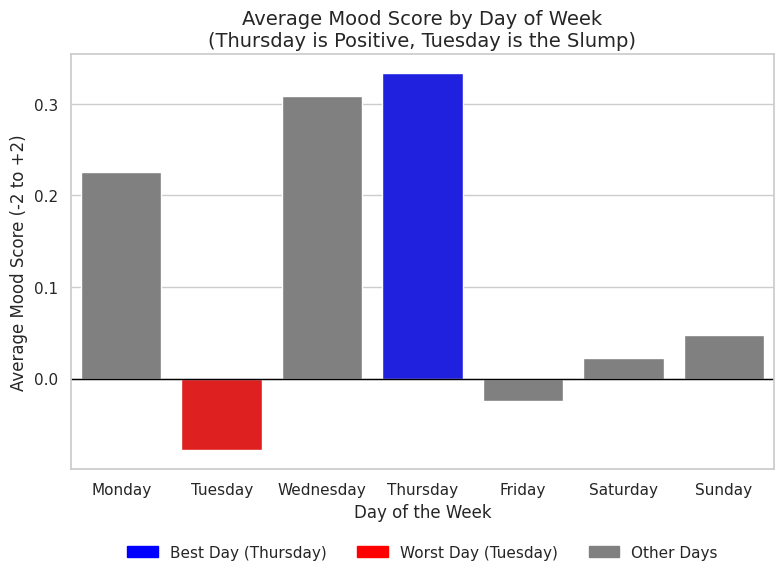

In [15]:
import matplotlib.patches as mpatches

# Calculate the Best and Worst Days
best_day = daily_mood.idxmax()
best_score = daily_mood.max()
worst_day = daily_mood.idxmin()
worst_score = daily_mood.min()

# Define Colors
color_best = 'Blue'
color_worst = 'Red'
color_other = 'Grey'

# Create the color list for the bars
colors = [color_best if x == best_day else color_worst if x == worst_day else color_other for x in daily_mood.index]

# Plot Dynamic Title
best_desc = "Positive" if best_score > 0 else "Highest"
title_text = f'Average Mood Score by Day of Week\n({best_day} is {best_desc}, {worst_day} is the Slump)'

# Plot Color with Legend
plt.figure(figsize=(8, 6))
sns.barplot(x=daily_mood.index, y=daily_mood.values, palette=colors)

plt.title(title_text, fontsize=14)
plt.ylabel('Average Mood Score (-2 to +2)')
plt.xlabel('Day of the Week')
plt.axhline(0, color='black', linewidth=1)

# Create custom handles for the legend
legend_handles = [
  mpatches.Patch(color=color_best, label=f'Best Day ({best_day})'),
  mpatches.Patch(color=color_worst, label=f'Worst Day ({worst_day})'),
  mpatches.Patch(color=color_other, label='Other Days')
]

# Place legend below the x-axis
plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

## Cause Comparison

1. Plot Monday

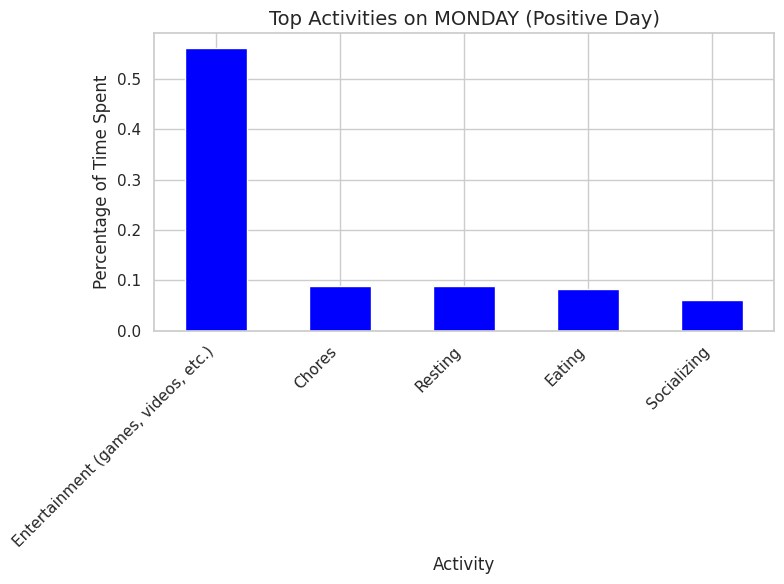

In [16]:
# Filter for Monday and calculate percentages
monday_activities = df[df['Day'] == 'Monday']['What were you mainly doing?'].value_counts(normalize=True).head(5)

plt.figure(figsize=(8, 6))

monday_activities.plot(kind='bar', color='Blue')

plt.title('Top Activities on MONDAY (Positive Day)', fontsize=14)
plt.ylabel('Percentage of Time Spent')
plt.xlabel('Activity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Plot Tuesday

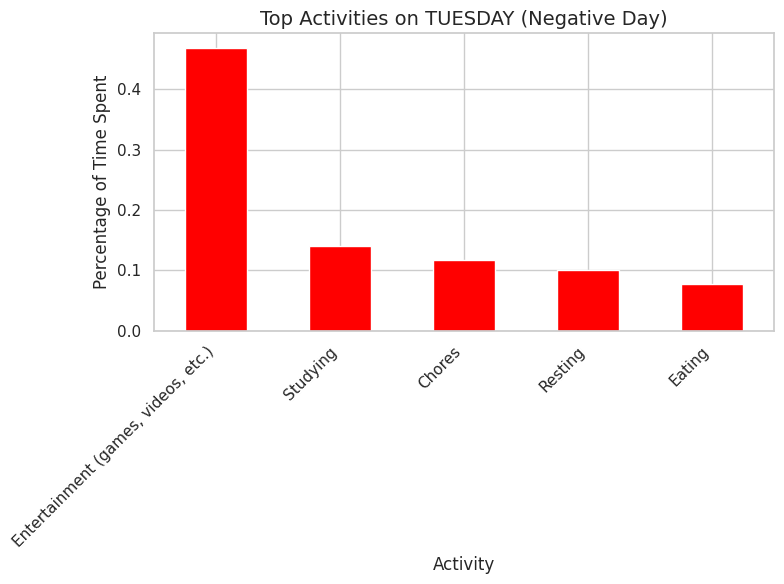

In [17]:
# Filter for Tuesday and calculate percentages
tuesday_activities = df[df['Day'] == 'Tuesday']['What were you mainly doing?'].value_counts(normalize=True).head(5)

plt.figure(figsize=(8, 6))

tuesday_activities.plot(kind='bar', color='Red')

plt.title('Top Activities on TUESDAY (Negative Day)', fontsize=14)
plt.ylabel('Percentage of Time Spent')
plt.xlabel('Activity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Emotions

* Filter for Tuesday AND rows that have NEGATIVE Affects
* Filter for Monday AND rows that have POSITIVE Affects

In [18]:
# Monday
monday_pos = df[
  (df['Day'] == 'Monday') &
  (df['Positive Affect (PANAS + POMS “Vigor/Serenity”)'].notna())
]

# Tuesday
tuesday_neg = df[
  (df['Day'] == 'Tuesday') &
  (df['Negative Affect (PANAS + POMS “Tension/Depression/Anger/Fatigue”)'].notna())
]

* Count the comma-separated words for Monday and Tuesday

In [19]:
# Monday
# This splits "Motivated, Relaxed" into separate counts
pos_counts = monday_pos['Positive Affect (PANAS + POMS “Vigor/Serenity”)']\
  .str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(5)

# Tuesday
# This splits "Anxious, Tired" into separate counts for "Anxious" and "Tired"
neg_counts = tuesday_neg['Negative Affect (PANAS + POMS “Tension/Depression/Anger/Fatigue”)']\
  .str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(5)

1. Plot Positive Monday

/tmp/ipython-input-2422913105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts.values, y=pos_counts.index, palette='Blues_r')


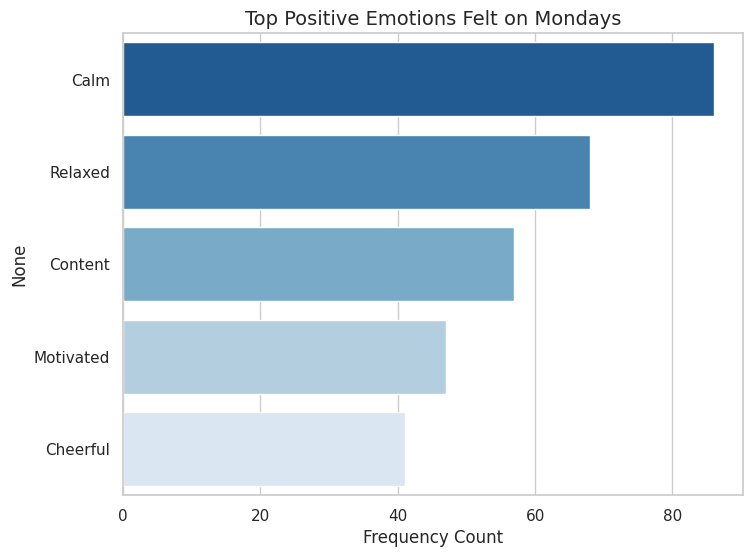

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x=pos_counts.values, y=pos_counts.index, palette='Blues_r')
plt.title('Top Positive Emotions Felt on Mondays', fontsize=14)
plt.xlabel('Frequency Count')
plt.show()

2. Plot Negative Tuesday

/tmp/ipython-input-1417935374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_counts.values, y=neg_counts.index, palette='Reds_r')


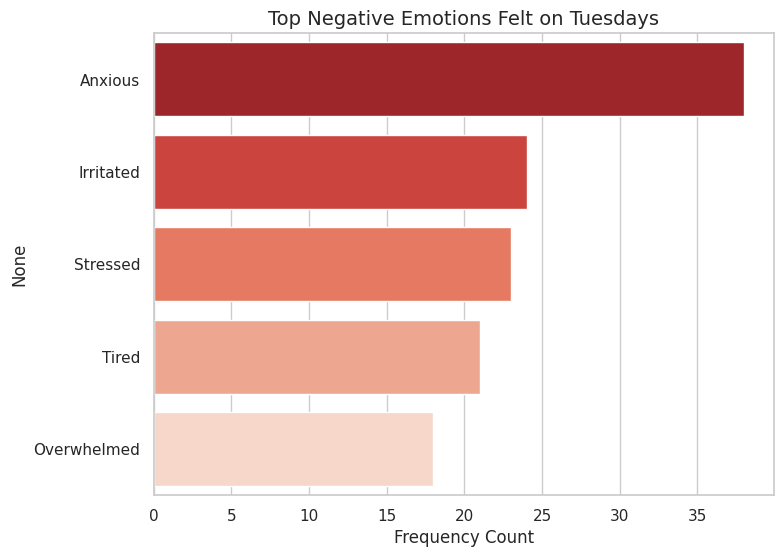

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=neg_counts.values, y=neg_counts.index, palette='Reds_r')
plt.title('Top Negative Emotions Felt on Tuesdays', fontsize=14)
plt.xlabel('Frequency Count')
plt.show()

# Statistical Analysis

## T-Test

1. Separate the mood scores for Monday and Tuesday

In [22]:
import scipy.stats as stats
monday_scores = df[df['Day'] == 'Monday']['Mood_Score']
tuesday_scores = df[df['Day'] == 'Tuesday']['Mood_Score']

2. Run an Independent T-Test

In [23]:
t_stat, p_value = stats.ttest_ind(monday_scores, tuesday_scores)

print(f"Monday Mean: {monday_scores.mean():.2f}")
print(f"Tuesday Mean: {tuesday_scores.mean():.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation logic
if p_value < 0.05:
  print("RESULT: Monday is STATISTICALLY DIFFERENT and more affective state than Tuesday. (p < 0.05)")
else:
  print("RESULT: Monday is NOT statistically different and more affective state than Tuesday.")

Monday Mean: 0.23
Tuesday Mean: -0.08
T-Statistic: 2.97
P-Value: 0.0033
RESULT: Monday is STATISTICALLY DIFFERENT and more affective state than Tuesday. (p < 0.05)


### **Interpretation of Result**:
A T-Test confirmed that the mood difference between Monday (M=0.23) and Tuesday (M=-0.08) was statistically significant (P-Value = 0.0033 < 0.05).

## Histogram of Mood Scores (Figure 1)

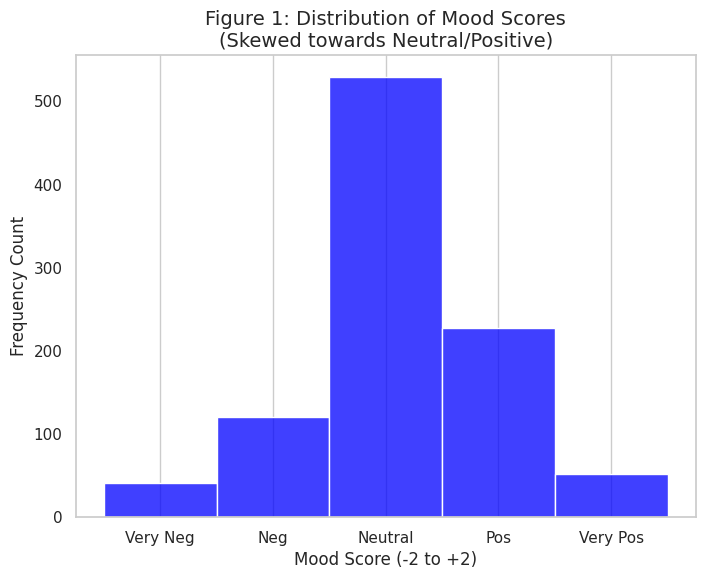

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Mood_Score'], bins=5, kde=False, discrete=True, color='Blue')
plt.title('Figure 1: Distribution of Mood Scores\n(Skewed towards Neutral/Positive)', fontsize=14)
plt.xlabel('Mood Score (-2 to +2)')
plt.ylabel('Frequency Count')
plt.xticks([-2, -1, 0, 1, 2], ['Very Neg', 'Neg', 'Neutral', 'Pos', 'Very Pos'])
plt.grid(axis='y')
plt.show()

## Time-Series Trend (Figure 2)

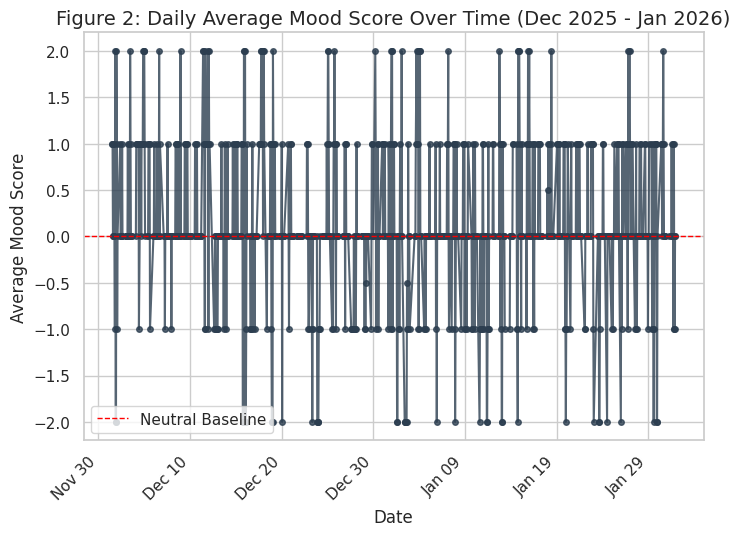

In [25]:
import matplotlib.dates as mdates

# Calculate daily average
daily_avg = df.groupby('Date')['Mood_Score'].mean()

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the line
ax.plot(daily_avg.index, daily_avg.values, marker='o', markersize=4, linestyle='-', color='#2c3e50', alpha=0.8)

# Add the Neutral Baseline
ax.axhline(0, color='red', linestyle='--', linewidth=1, label='Neutral Baseline')

# Set ticks to appear every 10 days
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))

# Format the text as "Month-Day" (e.g., Dec 01)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate(rotation=45)

plt.title('Figure 2: Daily Average Mood Score Over Time (Dec 2025 - Jan 2026)', fontsize=14)
plt.ylabel('Average Mood Score')
plt.xlabel('Date')
plt.legend()
plt.grid(True)

plt.show()

## Correlation Matrix (Figure 3)

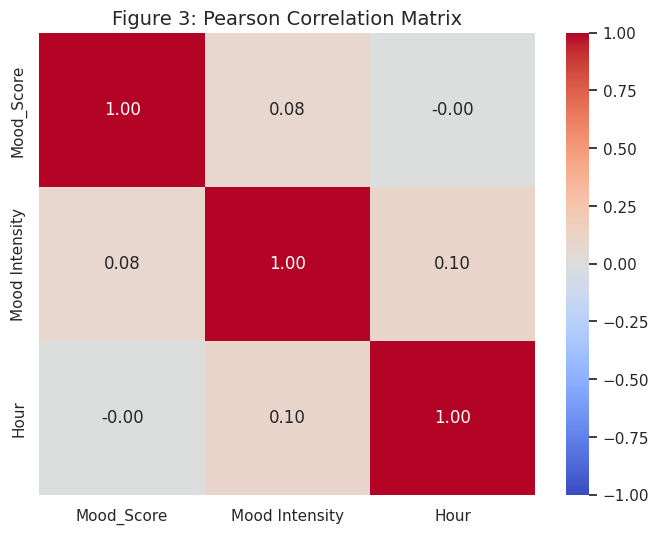

--- SUMMARY STATISTICS (Table 1) ---
       Mood_Score  Mood Intensity
count      969.00          969.00
mean         0.13            3.11
std          0.85            1.04
min         -2.00            1.00
25%          0.00            2.00
50%          0.00            3.00
75%          1.00            4.00
max          2.00            5.00


In [26]:
# Select only numerical columns for correlation
corr_cols = ['Mood_Score', 'Mood Intensity', 'Hour']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Figure 3: Pearson Correlation Matrix', fontsize=14)
plt.show()

print("--- SUMMARY STATISTICS (Table 1) ---")
print(df[['Mood_Score', 'Mood Intensity']].describe().round(2))